# ML 분석 with fMRI

디코딩 분석에는 항상 두 가지 데이터 세트가 필요. R(response)랑 예측하려는 단일 실험적 feature : S(stimuli)

incoding 분석 : 독립변수(`feature`)를 사용하여 종속변수(`brain data`)를 예측

decoding 분석 : 독립변수(`brain pattern`)를 사용하여 종속변수(`feature`)를 예측

In [1]:
# R = brain data, S = Y값

from nilearn import image
bold = image.load_img('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

In [16]:
# confounds
import pandas as pd

'''
, '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203'
'''

base_path = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID{}/func/sub-ID{}_task-r1_desc-confounds_timeseries.tsv'
sub_ids = ['2207071']

con_list = []

for sub_id in sub_ids:
    file_path = base_path.format(sub_id, sub_id)
    con = pd.read_csv(file_path, sep='\t')

    con1 = con.fillna(con.mean())

    con_list.append(pd.DataFrame(con1))
    

In [17]:
len(con_list)

1

In [2]:
import numpy as np
R = bold.get_fdata()
n_voxels = np.prod(R.shape[:-1])
n_voxels

325325

In [3]:
X = R.reshape(-1, n_voxels)
X = np.array(X)
X

array([[ 0.        ,  0.        ,  0.        , ..., 12.63614931,
        10.55599697,  9.18992677],
       [11.02170272, 10.33866762,  9.81086777, ..., 11.92206717,
        13.78489016, 12.48091406],
       [12.88452571,  9.46935022,  9.15887972, ...,  8.01013888,
         8.47584463,  8.87945627],
       ...,
       [ 9.84191482, 10.02819712, 14.34373706, ..., 10.24552647,
         9.43830317, 12.29463176],
       [12.72929046, 10.33866762, 12.10834946, ...,  5.52637488,
         7.26500968,  6.89244508],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [4]:
X.shape

(275, 325325)

In [15]:
import pandas as pd
import numpy as np
'''
, '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203'
'''

base_path = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID{}/eve_files/sub-ID{}_task-r1_events.tsv'
sub_ids = ['2207071']

from scipy.interpolate import interp1d

onset_list = []

for sub_id in sub_ids:
    file_path = base_path.format(sub_id, sub_id)
    onset_file = pd.read_csv(file_path, sep='\t')

    events = onset_file['stim_onset'].values
    predictor_all = np.zeros(550, dtype=int)
    
    for i in range(4):
         events1 = events.astype(int) + i
         predictor_all[events1.astype(int)] = 1

    original_scale = np.arange(0, 550, 1) # 0~550 초
    resampler = interp1d(original_scale, predictor_all)

    desired_scale = np.arange(0, 550, 2)
    y = resampler(desired_scale)

    onset_list.append(y)

In [20]:
onset_y = np.concatenate(onset_list)
y = onset_y.ravel()
y

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0.


## 표준화.

안해도 될거같은데 우선해보자

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
X_norm1 = scaler.fit_transform(X)

In [13]:
print(scaler.mean_.shape, scaler.scale_.shape)

(325325,) (325325,)


In [14]:
# Below, we use a "list comprehension" to loop across our runs
# to standardize each run separately!
X_norm = [scaler.fit_transform(i.reshape(1,-1)) for i in X]

In [15]:
# X = np.vstack(X_norm)
# 이 X로 해야하는데 우선은 표준화 안하고 해보자.

In [21]:
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (275, 325325)
Shape y: (275,)


# 모델 피팅 로지스틱 회귀

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# clf = CLassiFier
clf = LogisticRegression(solver='lbfgs')

In [24]:
# The text in the output cell is there because the
# fit model returns "itself" (you can just ignore this)
clf.fit(X, y)

LogisticRegression()

In [25]:
print("Shape of coef_:", clf.coef_.shape)

Shape of coef_: (1, 325325)


In [26]:
pred = clf.predict(X)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion = confusion_matrix(y, pred)
accuracy = accuracy_score(y, pred)
recall = recall_score(y, pred)
precision = precision_score(y, pred)

print('혼동행렬 : \n',
      confusion)
print(f"정화도 : {accuracy:.4f}, 민감도 : {recall:.4f}, 정밀도 : {precision:.4f}")

혼동행렬 : 
 [[152   3]
 [  9 111]]
정화도 : 0.9564, 민감도 : 0.9250, 정밀도 : 0.9737


## CV 하기(10-fold)

In [23]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('prerocessor', StandardScaler()),
    ('model', clf)
])

In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')

In [35]:
cv_scores

array([0.43636364, 0.52727273, 0.56363636, 0.45454545, 0.47272727])

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = []
recall = []
precision = []

# K-Fold 교차 검증을 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 모델을 학습
    clf.fit(X_train, y_train)
    
    # 평가 코드
    pred = clf.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, pred),3))
    recall.append(round(recall_score(y_test, pred),3))
    precision.append(round(precision_score(y_test, pred),3))

print('분할 마다 정확도 :', accuracy)
print('분할 마다 민감도 :', recall)
print('분할 마다 정밀도 :', precision)
print('정확도 평균 :', round(np.mean(accuracy),3),
      '민감도 평균 :', round(np.mean(recall),3),
      '정밀도 평균 :', round(np.mean(precision),3))



분할 마다 정확도 : [0.464, 0.357, 0.607, 0.607, 0.607, 0.556, 0.37, 0.519, 0.333, 0.63]
분할 마다 민감도 : [0.471, 0.308, 0.571, 0.571, 0.444, 0.5, 0.333, 0.444, 0.333, 0.692]
분할 마다 정밀도 : [0.571, 0.308, 0.615, 0.615, 0.4, 0.417, 0.214, 0.333, 0.286, 0.6]
정확도 평균 : 0.505 민감도 평균 : 0.467 정밀도 평균 : 0.436


In [39]:
pred2 = clf.predict(X_test)
confusion2 = confusion_matrix(y_test, pred2)
accuracy2 = accuracy_score(y_test, pred2)
recall2 = recall_score(y_test, pred2)
precision2 = precision_score(y_test, pred2)

print('혼동행렬 : \n',
      confusion2)
print(f"정화도 : {accuracy2:.4f}, 민감도 : {recall2:.4f}, 정밀도 : {precision2:.4f}")

혼동행렬 : 
 [[8 6]
 [4 9]]
정화도 : 0.6296, 민감도 : 0.6923, 정밀도 : 0.6000


## feature 선택/추출

1. 특징 추출 : PCA, 아틀라스의 뇌 영역 내 평균 특징
2. 특징 선택 : ROI(not pattern), 단변량 특징 선택(UFS)

### ROI 선택.

Harvard-Oxford atals 가져오기

In [27]:
from nilearn.datasets import fetch_atlas_harvard_oxford

ho_atlas = fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm')

In [28]:
ho_atlas['labels']

['Background',
 'Left Cerebral White Matter',
 'Left Cerebral Cortex ',
 'Left Lateral Ventrical',
 'Left Thalamus',
 'Left Caudate',
 'Left Putamen',
 'Left Pallidum',
 'Brain-Stem',
 'Left Hippocampus',
 'Left Amygdala',
 'Left Accumbens',
 'Right Cerebral White Matter',
 'Right Cerebral Cortex ',
 'Right Lateral Ventricle',
 'Right Thalamus',
 'Right Caudate',
 'Right Putamen',
 'Right Pallidum',
 'Right Hippocampus',
 'Right Amygdala',
 'Right Accumbens']

In [29]:
# 시각과 관련된 Cerebral cortex 가져오기

r_cortex = ho_atlas['labels'].index('Right Cerebral Cortex ')
print('Right Cerebral Cortex index :', r_cortex)

Right Cerebral Cortex index : 13


In [30]:
import nibabel as nib

ho_map = ho_atlas['maps']
print('Shape of map:', ho_map.shape)

Shape of map: (91, 109, 91)


In [31]:
print('Shape of our data:', bold.shape)

Shape of our data: (65, 77, 65, 275)


이렇게 보면 우리 데이터보다 atlas가 크다. 아틀라스는 2mm 공간에서 정의 되었지만, 우리 데이터는 3mm로 처리되었기 때문

In [32]:
from nilearn import image

ho_map_resamp = image.resample_to_img(ho_map, bold, interpolation='nearest')
print('Shape of resampled map:', ho_map_resamp.shape)

Shape of resampled map: (65, 77, 65)


이제 우리가 고른 오른쪽 cortex에 해당하는 라벵이 포함된 harvard-oxford의 복셀을 확인하여 ROI를 만들수 있음

In [33]:
# 리샘플한 roi map에서 r_cortex의 index와 같은 부분만 
r_cortex_roi = ho_map_resamp.get_fdata() == r_cortex

In [34]:
# 뇌 영상 데이터 저장(ROI 저장 Nifti로)
# cortex 부분은 1, 아닌 부분은 0으로 넣어준 것
r_cortex_roi2 = nib.Nifti1Image(r_cortex_roi.astype(np.int32), affine=ho_map_resamp.affine, dtype=np.int32)
print("Shape of amygdala ROI:", r_cortex_roi2.shape)

Shape of amygdala ROI: (65, 77, 65)


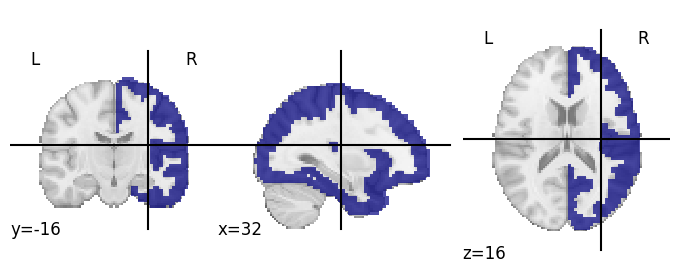

In [35]:
from nilearn import plotting

plotting.plot_roi(r_cortex_roi2)

In [36]:
# 마스크 적용

from nilearn import masking

R_cortex = masking.apply_mask(bold, r_cortex_roi2)
print("Shape of indexed data:", R_cortex.shape)

Shape of indexed data: (275, 18997)


In [37]:
# 분석해보기.
R_cortex

array([[592.40875933, 501.81346769, 561.05123892, ...,  33.9654726 ,
        286.96788232, 123.53621159],
       [603.4615091 , 527.79984847, 569.5581306 , ...,  31.32647336,
        277.21910864, 121.95281205],
       [573.56320003, 494.42426981, 546.70750186, ...,  27.88025082,
        281.50360153, 119.6863774 ],
       ...,
       [591.81886538, 502.09289114, 579.55528067, ...,  51.04135005,
        289.48269336, 133.65754986],
       [597.50047551, 496.75279856, 579.40004542, ...,  40.57849423,
        297.15131469, 122.79108239],
       [594.30262937, 502.65173804, 569.65127175, ...,  38.96404764,
        287.34044692, 125.49217574]])

### 

In [38]:
print("Shape X:", R_cortex.shape)
print("Shape y:", y.shape)

Shape X: (275, 18997)
Shape y: (275,)


In [39]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = []
recall = []
precision = []

# K-Fold 교차 검증을 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = R_cortex[train_index], R_cortex[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 모델을 학습
    clf.fit(X_train, y_train)
    
    # 평가 코드
    pred = clf.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, pred),3))
    recall.append(round(recall_score(y_test, pred),3))
    precision.append(round(precision_score(y_test, pred),3))

print('분할 마다 정확도 :', accuracy)
print('분할 마다 민감도 :', recall)
print('분할 마다 정밀도 :', precision)
print('정확도 평균 :', round(np.mean(accuracy),3),
      '민감도 평균 :', round(np.mean(recall),3),
      '정밀도 평균 :', round(np.mean(precision),3))



분할 마다 정확도 : [0.821, 0.893, 0.857, 0.786, 0.75, 0.852, 0.815, 0.926, 0.852, 0.741]
분할 마다 민감도 : [0.5, 0.6, 0.5, 0.286, 0.0, 0.5, 0.5, 0.5, 0.571, 0.333]
분할 마다 정밀도 : [0.8, 0.75, 1.0, 0.667, 0.0, 0.5, 0.4, 1.0, 0.8, 0.4]
정확도 평균 : 0.829 민감도 평균 : 0.429 정밀도 평균 : 0.632


결과를 보면 정확도가 좀 오르긴 했다!

### PCA로 해보기

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

print('Shape before pca:', R_cortex.shape)
pca.fit(R_cortex)
R_cortex_pca = pca.transform(R_cortex)
print('Shape after pca:', R_cortex_pca.shape)

Shape before pca: (275, 18997)
Shape after pca: (275, 10)


In [41]:
import warnings
warnings.filterwarnings("ignore")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = []
recall = []
precision = []

# K-Fold 교차 검증을 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = R_cortex_pca[train_index], R_cortex_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 모델을 학습
    clf.fit(X_train, y_train)
    
    # 평가 코드
    pred = clf.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, pred),3))
    recall.append(round(recall_score(y_test, pred),3))
    precision.append(round(precision_score(y_test, pred),3))

print('분할 마다 정확도 :', accuracy)
print('분할 마다 민감도 :', recall)
print('분할 마다 정밀도 :', precision)
print('정확도 평균 :', round(np.mean(accuracy),3),
      '민감도 평균 :', round(np.mean(recall),3),
      '정밀도 평균 :', round(np.mean(precision),3))

print(confusion_matrix(y_test, pred))

분할 마다 정확도 : [0.679, 0.821, 0.679, 0.75, 0.75, 0.852, 0.778, 0.815, 0.741, 0.741]
분할 마다 민감도 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
분할 마다 정밀도 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
정확도 평균 : 0.761 민감도 평균 : 0.0 정밀도 평균 : 0.0
[[20  1]
 [ 6  0]]


다음에 정확한 뇌 부위 정해서 해봐야겠다.

### 지역 평균

지금까지 단일 ROI 확인했는데, 전체 뇌 패턴을 포함할 수도 있음.
각 복셀의 활동을 사용하는게 아니라 ROI 지역 평균 활동을 사용하는 것.
우선 기존 ROI 사용해보자.

In [42]:
from nilearn.datasets import fetch_atlas_schaefer_2018
# 관심 roi 100구역, 공간 해상도 2mm
schaefer_parc = fetch_atlas_schaefer_2018(n_rois=100, resolution_mm=2, verbose=False)

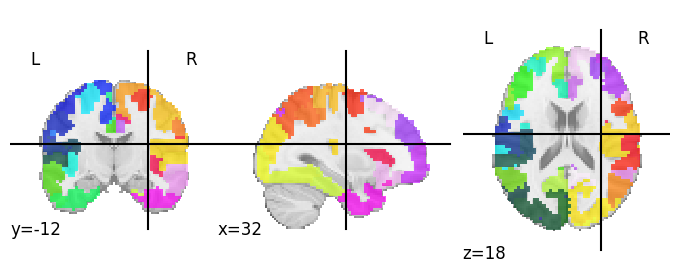

In [43]:
# 해상도 리샘플링

schaefer_parc = image.resample_to_img(schaefer_parc['maps'], bold, interpolation='nearest')

plotting.plot_roi(schaefer_parc)

여기서 사용하는건 불연속적 ROI로 단일 복셀을 단일 ROI에만 속할 수 있다.
maps 맵은 정수가 포한된 단일 볼륨으로 정수 값을 포함하는 3D 공간 내의 데이터로 표현된다.
이 볼륨은 뇌의 다양한 영역을 나타내며, 각 영역을 정수값으로 구분된다. 

In [44]:
roi_ints = schaefer_parc.get_fdata()
np.unique(roi_ints)
# 0 index에 포함된 복셀은 어떤 지역에도 속하지 않음

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [45]:
# 평균값 만들기
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img = schaefer_parc, standardize=True)
roi_mean_values = masker.fit_transform(bold)

In [46]:
roi_mean_values

array([[ 1.42591606,  2.99459732,  2.4039419 , ..., -1.19079828,
         0.69773668,  0.23088289],
       [ 0.46315335,  2.1364887 ,  1.4663917 , ..., -1.49948372,
         1.43665701, -0.20393606],
       [ 1.83655778,  2.16980811,  1.52039213, ..., -1.78527648,
         1.89886176, -0.01239202],
       ...,
       [ 0.88411898, -1.90920413,  0.58265491, ...,  1.25960806,
         0.71339092,  0.14313615],
       [ 1.12480966,  0.15140977,  1.38083259, ...,  1.43449148,
         0.63235327,  0.68684159],
       [ 1.48184111,  0.95577077,  1.23094051, ...,  2.12992226,
         0.44990047,  1.46761424]])

In [47]:
print("Shape X:", roi_mean_values.shape)
print("Shape y:", y.shape)

Shape X: (275, 100)
Shape y: (275,)


In [48]:
import warnings
warnings.filterwarnings("ignore")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy = []
recall = []
precision = []

# K-Fold 교차 검증을 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = roi_mean_values[train_index], roi_mean_values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 모델을 학습
    clf.fit(X_train, y_train)
    
    # 평가 코드
    pred = clf.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, pred),3))
    recall.append(round(recall_score(y_test, pred),3))
    precision.append(round(precision_score(y_test, pred),3))

print('분할 마다 정확도 :', accuracy)
print('분할 마다 민감도 :', recall)
print('분할 마다 정밀도 :', precision)
print('정확도 평균 :', round(np.mean(accuracy),3),
      '민감도 평균 :', round(np.mean(recall),3),
      '정밀도 평균 :', round(np.mean(precision),3))

print(confusion_matrix(y_test, pred))

분할 마다 정확도 : [0.821, 0.857, 0.75, 0.821, 0.786, 0.778, 0.852, 0.852, 0.704, 0.815]
분할 마다 민감도 : [0.5, 0.6, 0.375, 0.714, 0.143, 0.25, 0.5, 0.25, 0.571, 0.833]
분할 마다 정밀도 : [0.8, 0.6, 0.6, 0.625, 1.0, 0.25, 0.5, 0.5, 0.444, 0.556]
정확도 평균 : 0.804 민감도 평균 : 0.474 정밀도 평균 : 0.588
[[17  4]
 [ 1  5]]


## 서치 라이트 분석

일변량 분석과 다변량 분석을 일종의 혼합한 디코딩 기반 분석으로, 로컨 복셀 패턴을 분석. 뇌의 모든 위치에 대해 분석.
특정 중심 복셀(특정 반경 포함) 주변의 복셀로 구성된 구형 서치라이트를 정의하여 이를 수행. 모든 복셀에 대해 중심 복셀이 될 때 까지 반복.

In [49]:
from nilearn.decoding import SearchLight

`mask_img` : 실제 뇌가 포함된 복셀을 나타내는 바이너리 마스크

`process_mask_img` : 어떤 복셀을 분석해야하는지 나타내는 바이너리 마스크

`radius` : 서치라이트 구의 반경(mm)

`estimator` : 사이킷런 호환 추정기(분류 모델이나 파이프 라인)

`n_jobs` : 사용할 CPU 수

`scoring` : 체점 방법(accuracy, recall 등)

`cv` : 교차검증

`verdos` : 알지??

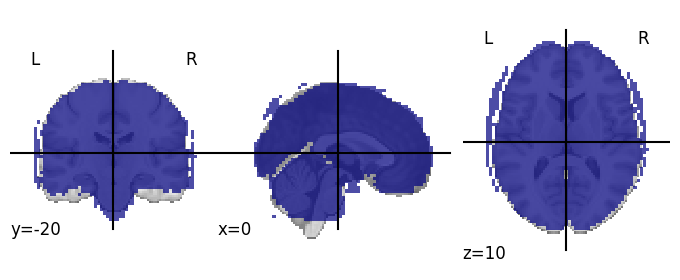

In [50]:
# img.sum(axis=3) : 4차원 데이터의 각 슬라이스(3d 데이터)를 합산하는 작업 수행.
# axis=3은 데이터의 4번쨰 차원인 시간차원을 합산하도록 하는 것.
# '이 안의 공식' : 이 공식의 조건에 맞는 것만

# != 0으로 하면 뇌가 아닌 부분도 나와서 임의대로 해보았음.

from nilearn import plotting
brain_mask = image.math_img('(img.sum(axis=3) > 70000).astype(np.int32)', img=bold)
plotting.plot_roi(brain_mask)

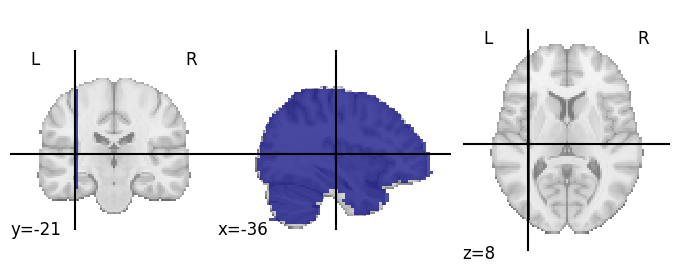

In [51]:
# `process_mask_img` 즉 분석할 mask도 위와같이 결정할 수 있는데, 우선은 맛보기니까 잘라서 보자.
from nilearn import masking

# Create empty volume
sl_mask = np.zeros(brain_mask.shape)

# Set the 22nd slice to 1
sl_mask[20, :, :] = 1

# Create a Nifti1Image object from it using the "image.new_img_like" function
# from Nilearn
sl_mask = image.new_img_like(brain_mask, sl_mask)

# Of course, we only want to analyze the voxels from that slice that
# are ALSO in the brain mask, so let's intersect them:
sl_mask = masking.intersect_masks((brain_mask, sl_mask), threshold=1)

# Let's plot it:
plotting.plot_roi(sl_mask);

In [52]:
# 파이프 라인 만들기
# StandardScaler()도 넣어야하는데 우선은 빼고 해보자
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

search_cv = KFold(n_splits=10, shuffle=True, random_state=42)
search_est = make_pipeline(LogisticRegression(solver='lbfgs'))

In [53]:
# 내 CPU

import os
os.cpu_count()

12

In [54]:
# 서치 라이트

sl = SearchLight(
    mask_img=brain_mask,
    process_mask_img=sl_mask,
    radius=5,  # we'll use a 5 mm radius
    estimator=search_est,
    n_jobs=-1,  # use only 1 core (for your own analyses, you might want to increase this!)
    scoring='accuracy',  # use accuracy as model performance metric
    cv=search_cv,
    verbose=True  # print a progressbar while fitting
)

In [55]:
print("Shape X:", bold.shape)
print("Shape y:", y.shape)

Shape X: (65, 77, 65, 275)
Shape y: (275,)


In [56]:
sl.fit(bold, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:   18.4s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.6s finished


SearchLight(cv=KFold(n_splits=10, random_state=42, shuffle=True),
            estimator=Pipeline(steps=[('logisticregression',
                                       LogisticRegression())]),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x0000026586687490>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x000002668F2EC0D0>,
            radius=5, scoring='accuracy', verbose=True)

In [57]:
print("Shape scores:", sl.scores_.shape)

Shape scores: (65, 77, 65)


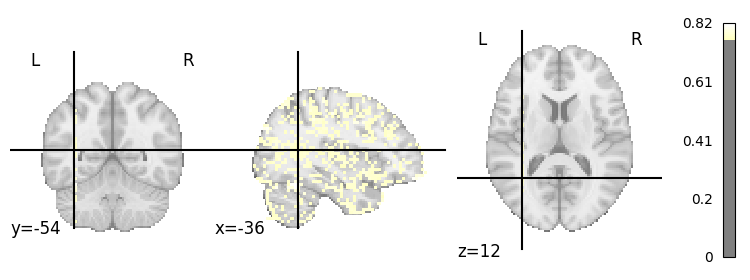

In [58]:
# 정확도 0.7 넘는 거만 한번 보자.
score_img = image.new_img_like(brain_mask, sl.scores_)
plotting.plot_stat_map(score_img, threshold=0.77)

In [59]:
# 좌표 추출
above_threshold_coords = np.argwhere(sl.scores_ >= 0.77)
above_threshold_coords

array([[20, 12, 25],
       [20, 13, 21],
       [20, 13, 24],
       ...,
       [20, 66, 26],
       [20, 66, 29],
       [20, 67, 23]], dtype=int64)

In [60]:
# 값도 마지막 열에 추가
result = pd.DataFrame(above_threshold_coords, columns=['x','y','z'])
result['Score'] = sl.scores_[sl.scores_ >= 0.77]

In [61]:
result.to_csv('D:/fmri/searchlight_0.77.csv', index=False)

In [62]:
from nilearn import datasets, image

# Harvard-Oxford Atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# Create an empty list to store the region names for the coordinates
mapped_regions = []

# Load the Harvard-Oxford Atlas image
atlas_img = atlas.maps

# Define the reference image, which should have the same resolution as your bold data

# Resample the atlas image to the resolution of the reference image
atlas_img_resampled = image.resample_to_img(atlas_img, bold)

# Iterate through the coordinates
for coord in above_threshold_coords:
    x, y, z = coord  # Coordinates directly from above_threshold_coords
    
    # Extract the region value from the resampled atlas image
    region_value = atlas_img_resampled.get_fdata()[x, y, z]
    
    # Get the region name from the atlas labels
    region_name = atlas.labels[int(region_value)]
    
    # Append the region name to the list
    mapped_regions.append(region_name)

# The mapped_regions list now contains the names of brain regions corresponding to the coordinates.
print(mapped_regions)



IndexError: list index out of range

In [63]:
np.unique(atlas_img_resampled.get_fdata())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61.])

In [64]:
np.unique(atlas)

array([{'filename': 'C:\\Users\\jin/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz', 'maps': <nibabel.nifti1.Nifti1Image object at 0x000002668F4B27C0>, 'labels': ['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior divisio

In [65]:
np.unique(region_value)

array([52.])